In [2]:
library(tidyverse)
library(kableExtra)
library(patchwork)

options(repr.plot.width=16, repr.plot.height=8)

# Amostragem e Delineamento
## Descrevendo populações e amostras

### Verificando as propriedades dos estimadores $\overline{X}$ e $s^2$

In [3]:
pop = c(2, 11, 15, 19, 9)
pop
N = length(pop)
N

[1]  2 11 15 19  9

[1] 5

### Média populacional

$$\mu=\frac{X_1+X_2+X_3+\cdots+X_N}{N}=\frac{\sum_{i=1}^N{X_i}}{N}$$

In [4]:
mu = mean(pop)
mu

[1] 11.2

#### Variância populacional

$$\sigma^2=\frac{\sum_{i=1}^N{(X_i - \mu)^2}}{N}$$

In [5]:
sigma2 = sum((pop - mu)^2) / N
sigma2

[1] 32.96

### Amostragem com reposição

In [8]:
mu
sigma2
n = 2
amostra = sample(pop, size = n, replace = TRUE)
amostra

mean(amostra)
var(amostra)

[1] 11.2

[1] 32.96

[1] 11  2

[1] 6.5

[1] 40.5

### TODOS os cenário possíveis para n = 2

In [12]:
pop
tab_df = data.frame(expand_grid(pop, pop))
colnames(tab_df) = c('X1', 'X2')
tab_df = tab_df %>% 
  rowwise() %>% 
  mutate(Xm = mean(c(X1,X2)),
         s2 = var(c(X1,X2)))

mean(tab_df$Xm)
mean(tab_df$s2)
tab_df


[1]  2 11 15 19  9

[1] 11.2

[1] 32.96

X1,X2,Xm,s2
<dbl>,<dbl>,<dbl>,<dbl>
2,2,2.0,0.0
2,11,6.5,40.5
2,15,8.5,84.5
2,19,10.5,144.5
2,9,5.5,24.5
11,2,6.5,40.5
11,11,11.0,0.0
11,15,13.0,8.0
11,19,15.0,32.0


### Distribuição de frequência de $\overline{X}$ e $s^2$

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


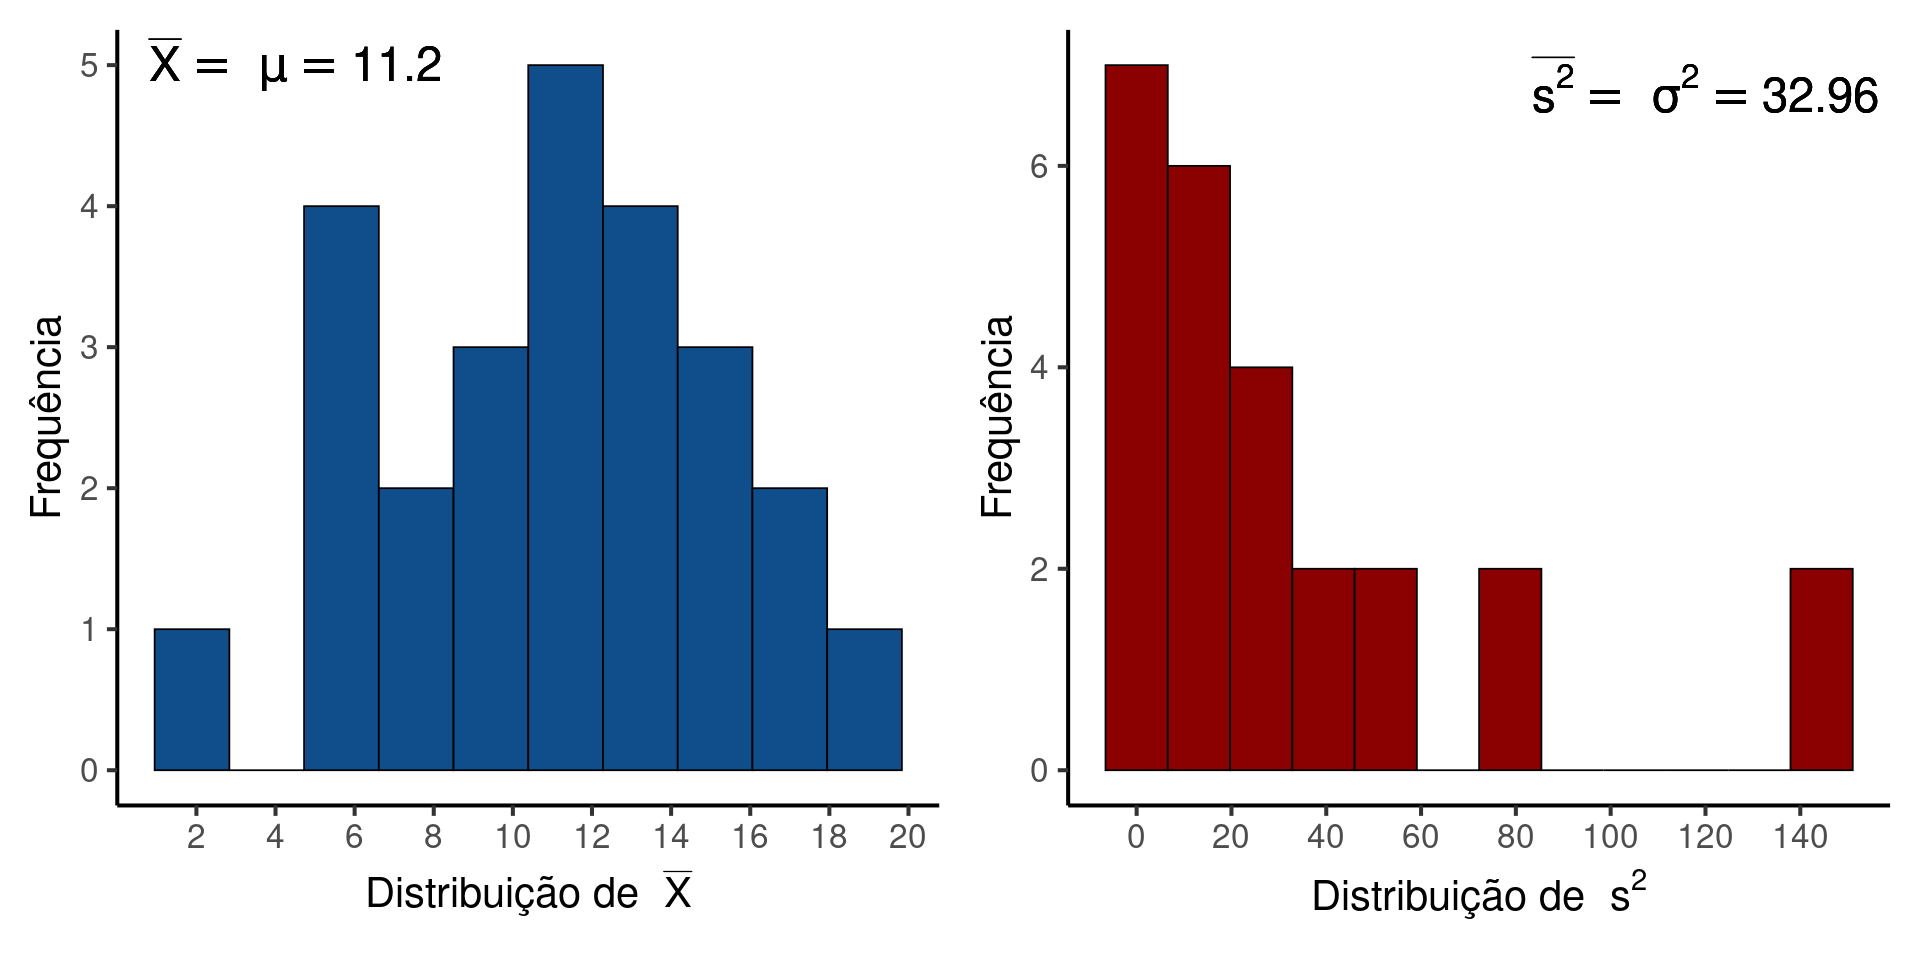

In [13]:
plt_Xm = ggplot(tab_df, aes(x = Xm)) +
  geom_histogram(fill = 'dodgerblue4', color = 'black', bins = 10) +
   labs(x = bquote('Distribuição de ' ~ bar(X)),
        y = "Frequência") +
  scale_x_continuous(breaks = seq(0, 20, by = 2)) +
  annotate('text', x = 4.5, y = 5, label = bquote(bar(X) == ~ mu == .(mean(tab_df$Xm))), size = 10) +
  theme_classic(base_size = 25)

plt_s2 = ggplot(tab_df, aes(x = s2)) +
  geom_histogram(fill = 'red4', color = 'black', bins = 12) +
   labs(x = bquote('Distribuição de ' ~ s^2),
        y = "Frequência") +
  scale_x_continuous(breaks = seq(0, 200, by = 20)) +
  annotate('text', x = 120, y = 6.8, label = bquote(bar(s^2) == ~ sigma^2 == .(mean(tab_df$s2))), size = 10) +
  theme_classic(base_size = 25)

plt_Xm | plt_s2